## Import Library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

## 1) Data Collecting

In [5]:
# Load Data
data = pd.read_csv('AIDS.csv')
data.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


## 2) Data Analysis

In [6]:
# Shape of Data
data.shape

(2139, 23)

In [7]:
data.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


In [8]:
data.tail()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
2134,1091,3,21,53.2980,1,0,0,100,0,1,...,1,3,0,1,1,152,109,561,720,0
2135,395,0,17,102.9672,1,0,0,100,0,1,...,1,3,0,0,1,373,218,1759,1030,0
2136,1104,2,53,69.8544,1,1,0,90,0,1,...,1,3,0,1,0,419,364,1391,1041,0
2137,465,0,14,60.0000,1,0,0,100,0,0,...,0,1,0,0,0,166,169,999,1838,1
2138,1045,3,45,77.3000,1,0,0,100,0,0,...,0,1,0,1,0,911,930,885,526,0


In [9]:
# Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2139 non-null   int64  
 1   trt       2139 non-null   int64  
 2   age       2139 non-null   int64  
 3   wtkg      2139 non-null   float64
 4   hemo      2139 non-null   int64  
 5   homo      2139 non-null   int64  
 6   drugs     2139 non-null   int64  
 7   karnof    2139 non-null   int64  
 8   oprior    2139 non-null   int64  
 9   z30       2139 non-null   int64  
 10  preanti   2139 non-null   int64  
 11  race      2139 non-null   int64  
 12  gender    2139 non-null   int64  
 13  str2      2139 non-null   int64  
 14  strat     2139 non-null   int64  
 15  symptom   2139 non-null   int64  
 16  treat     2139 non-null   int64  
 17  offtrt    2139 non-null   int64  
 18  cd40      2139 non-null   int64  
 19  cd420     2139 non-null   int64  
 20  cd80      2139 non-null   int6

In [10]:
# Data Description
data.describe().T

,count,mean,std,min,25%,50%,75%,max
time,2139.0,879.098177,292.274324,14.0,727.0000,997.0000,1091.0000,1231.00000
trt,2139.0,1.520804,1.127890,0.0,1.0000,2.0000,3.0000,3.00000
age,2139.0,35.248247,8.709026,12.0,29.0000,34.0000,40.0000,70.00000
wtkg,2139.0,75.125311,13.263164,31.0,66.6792,74.3904,82.5552,159.93936
hemo,2139.0,0.084151,0.277680,0.0,0.0000,0.0000,0.0000,1.00000
homo,2139.0,0.661057,0.473461,0.0,0.0000,1.0000,1.0000,1.00000
drugs,2139.0,0.131370,0.337883,0.0,0.0000,0.0000,0.0000,1.00000
karnof,2139.0,95.446470,5.900985,70.0,90.0000,100.0000,100.0000,100.00000
oprior,2139.0,0.021973,0.146629,0.0,0.0000,0.0000,0.0000,1.00000
z30,2139.0,0.550257,0.497584,0.0,0.0000,1.0000,1.0000,1.00000


In [11]:
# Target Variable Frequency
data['infected'].value_counts()

0    1618
1     521
Name: infected, dtype: int64

## 3) Data Validation

In [12]:
# Identify the types of columns (variables) in a dataframe based on their data types and characteristics
def grab_col_names(dataframe, cat_th = 10, car_th = 20):

    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]
    num_but_cat = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64"] and dataframe[col].nunique() < cat_th]
    cat_but_car = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object"] and dataframe[col].nunique() > car_th]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Observation Count: {dataframe.shape[0]}")
    print(f"Variabel Count: {dataframe.shape[1]}")
    print(f"Categorical: {len(cat_cols)}")
    print(f"Numeric: {len(num_cols)}")
    print(f"Categorcal but cardinal: {len(cat_but_car)}")
    print(f"Numeric but categorical: {len(num_but_cat)}")

    return cat_cols, num_cols, cat_but_car

In [13]:
# Visualize the distribution of categorical columns in a dataframe using two types of plots: countplot and pie plot
def plot_categorical(dataframe, categorical_columns): 
    num_cols = len(categorical_columns)
    num_rows = num_cols
    fig, axes = plt.subplots(num_rows, 2, figsize=(20, 5 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(categorical_columns):
        sns.countplot(x=col, data=dataframe, ax=axes[2*i], hue=col) 
        axes[2*i].set_title(f'{col} Count')
        axes[2*i].set_xlabel(col)
        axes[2*i].set_ylabel('Count')

        dataframe[col].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[2*i+1]) 
        axes[2*i+1].set_title(f'{col} Distribution')
        axes[2*i+1].set_ylabel('')

    plt.tight_layout()
    plt.show()

In [14]:
# Create a histogram for each numeric column in a dataframe
def plot_histograms(dataframe, numeric_columns):

    num_cols = len(numeric_columns)
    num_rows = (num_cols + 1) // 4 + ((num_cols + 1) % 4 != 0)
    fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_columns):
        dataframe[col].hist(ax=axes[i], bins=20)
        axes[i].set_title(col)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    for j in range(num_cols, num_rows * 4):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [15]:
# Analyze the relationship between a categorical column and a target (dependent variable) in a dataframe, and present the results in a table and bar chart visualization.
def target_summary_with_cat_visualized(dataframe, target, categorical_col):
    grouped_data = dataframe.groupby(categorical_col)[target].mean()
    summary_df = pd.DataFrame({"TARGET_MEAN": grouped_data})

    plt.figure(figsize=(5, 5))
    summary_df.plot(kind='bar')
    plt.title('Mean Target by ' + categorical_col)
    plt.xlabel(categorical_col)
    plt.ylabel('Mean Target')
    plt.xticks(rotation=1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}))
    print("-"*50)

In [16]:
# Analyze the relationship between a target column (categorical) and a numerical column in a dataframe
def target_summary_with_num_visualized(dataframe, target, numerical_col):
    grouped_data = dataframe.groupby(target)[numerical_col].mean()

    plt.figure(figsize=(5, 5))
    grouped_data.plot(kind='bar', color='skyblue')
    plt.title('Mean ' + numerical_col + ' by ' + target)
    plt.xlabel(target)
    plt.ylabel('Mean ' + numerical_col)
    plt.xticks(rotation=1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    print(dataframe.groupby(target).agg({numerical_col: "mean"}))
    print("-"*50)

In [17]:
# Create boxplot visualizations for all given numeric columns
def boxplot(dataframe, numeric_columns):
    num_plots = len(numeric_columns)
    num_rows = (num_plots + 3) // 4 
    fig, axes = plt.subplots(num_rows, 4, figsize=(18, 4*num_rows)) 
    for i, column in enumerate(numeric_columns):
        row = i // 4
        col = i % 4
        sns.boxplot(y=dataframe[column], ax=axes[row, col])
        axes[row, col].set_title(f'Boxplot of {column}')
        axes[row, col].set_ylabel(column)

    for j in range(num_plots, num_rows*4):
        row = j // 4
        col = j % 4
        fig.delaxes(axes[row, col]) 
    
    plt.tight_layout()
    plt.show()

In [18]:
# Calling the grab_col_names function 
cat_cols, num_cols, cat_but_car = grab_col_names(data)

Observation Count: 2139
Variabel Count: 23
Categorical: 15
Numeric: 8
Categorcal but cardinal: 0
Numeric but categorical: 15


In [19]:
# Category Column
cat_cols

['trt',
 'hemo',
 'homo',
 'drugs',
 'karnof',
 'oprior',
 'z30',
 'race',
 'gender',
 'str2',
 'strat',
 'symptom',
 'treat',
 'offtrt',
 'infected']

In [20]:
# Numeric Column
num_cols

['time', 'age', 'wtkg', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820']

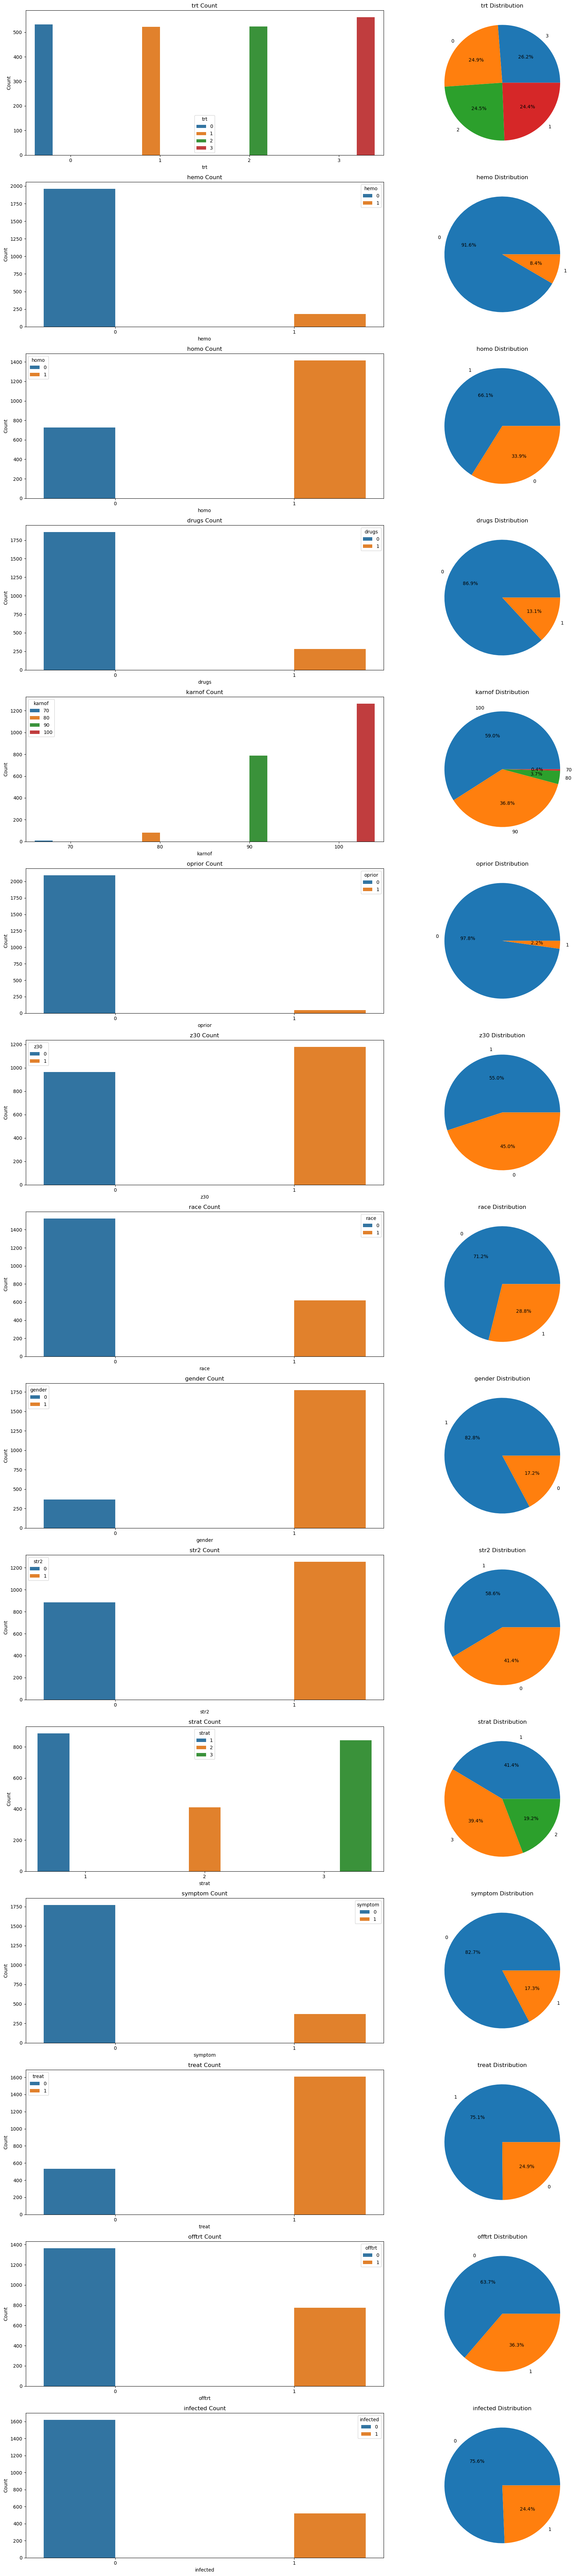

In [21]:
# Calling plot_categorical function
plot_categorical(data, cat_cols)

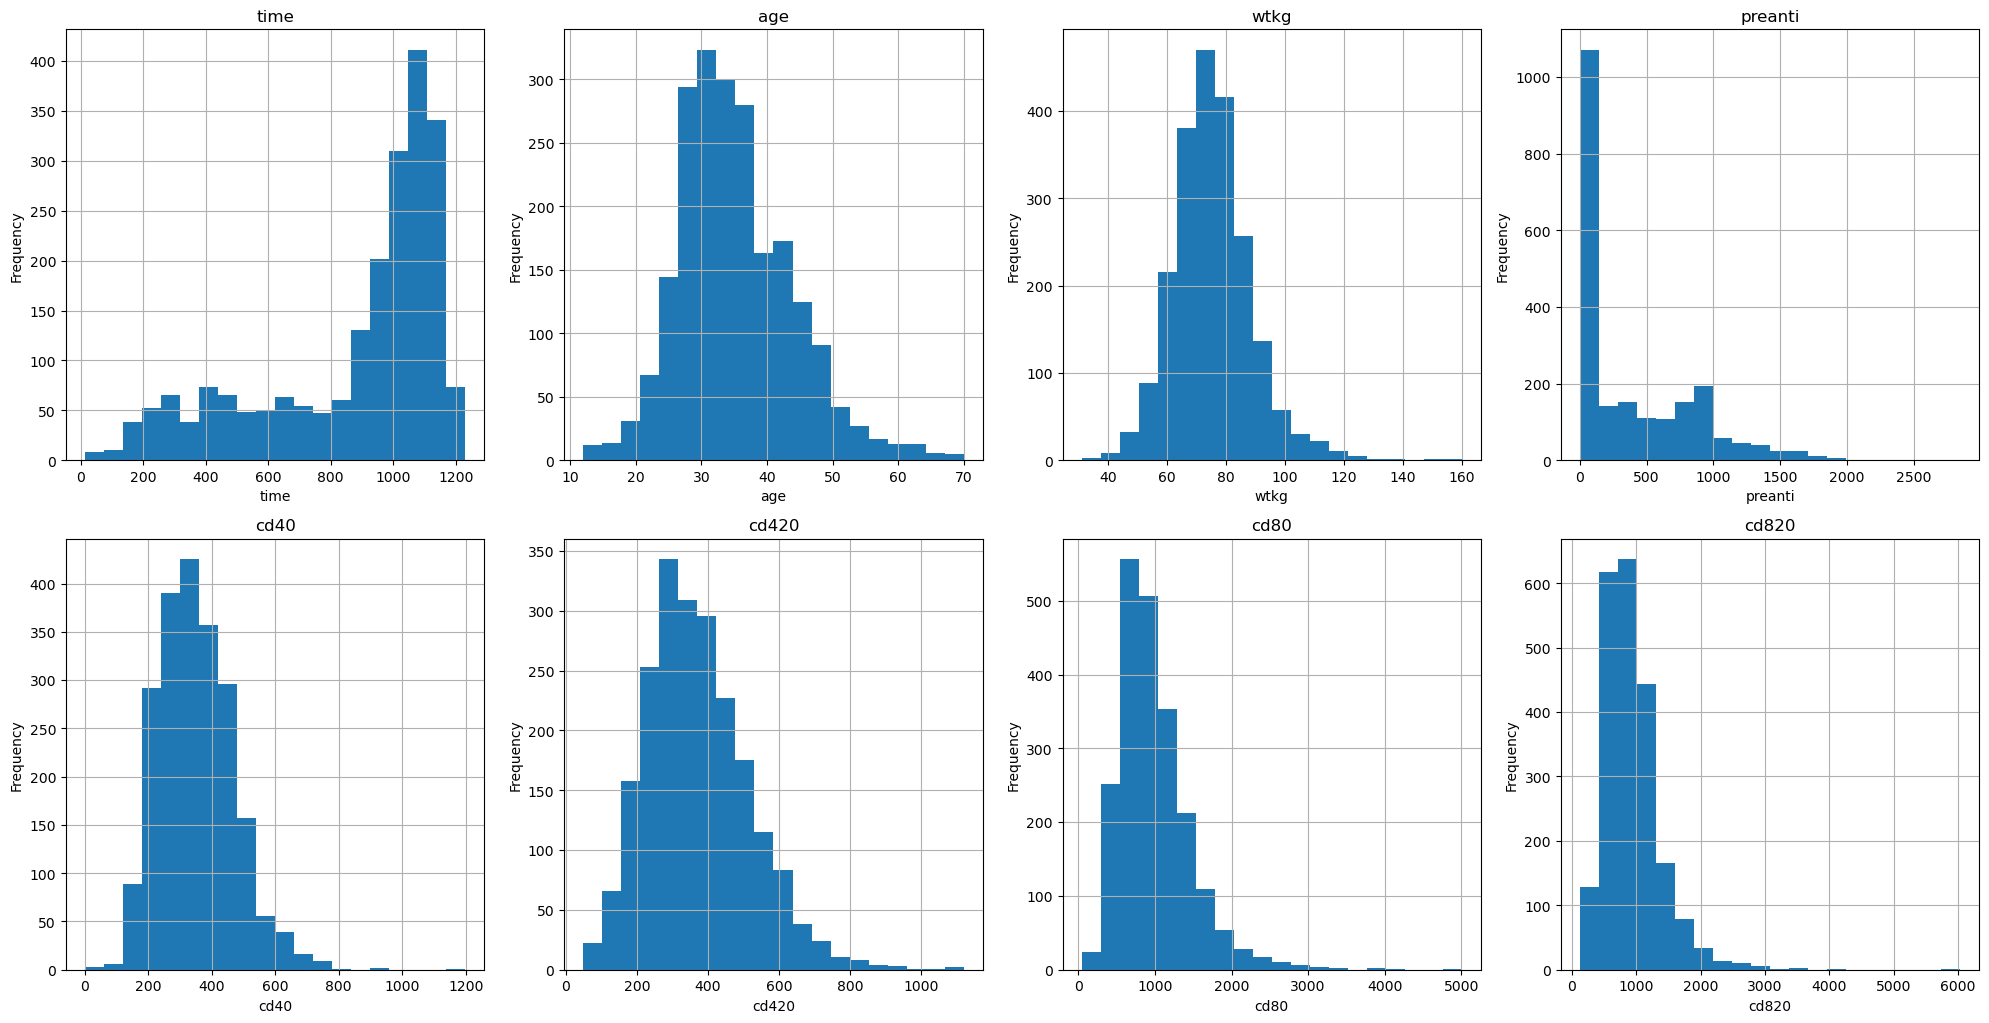

In [22]:
# Calling plot_histograms Function
plot_histograms(data, num_cols)

<Figure size 500x500 with 0 Axes>

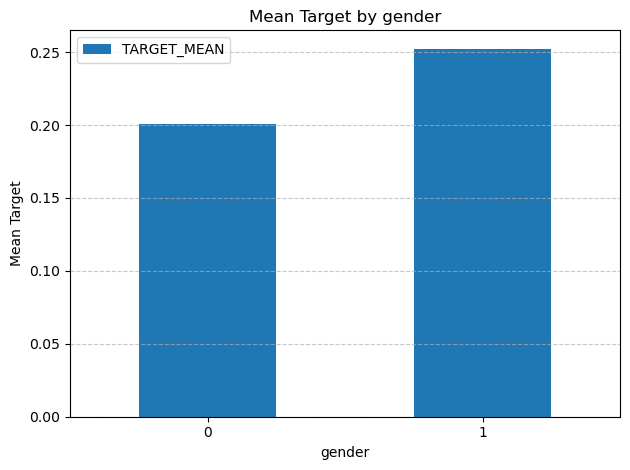

        TARGET_MEAN
gender             
0          0.201087
1          0.252400
--------------------------------------------------


In [23]:
# Calling target_summary_with_cat_visualized Function
target_summary_with_cat_visualized(data, "infected", "gender")

<Figure size 500x500 with 0 Axes>

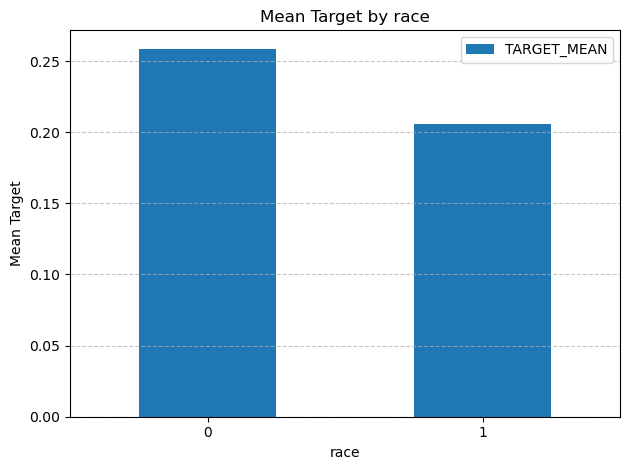

      TARGET_MEAN
race             
0        0.258870
1        0.205835
--------------------------------------------------


In [24]:
# Memanggil fungsi target_summary_with_cat_visualized untuk menganalisis hubungan antara kolom kategorikal dengan target
target_summary_with_cat_visualized(data, "infected", "race")

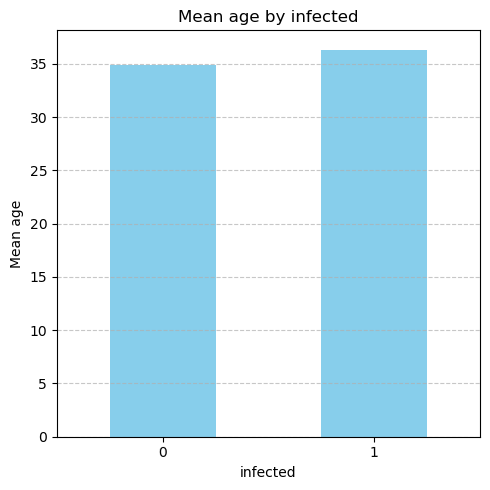

                age
infected           
0         34.900494
1         36.328215
--------------------------------------------------


In [25]:
# Calling target_summary_with_num_visualized Function
target_summary_with_num_visualized(data, "infected", "age")

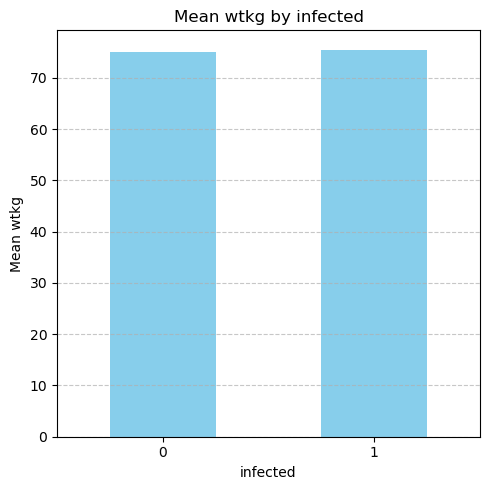

               wtkg
infected           
0         75.003379
1         75.503977
--------------------------------------------------


In [26]:
# Memanggil fungsi target_summary_with_num_visualized untuk menganalisis hubungan antara kolom target dengan kolom numerik
target_summary_with_num_visualized(data, "infected", "wtkg")

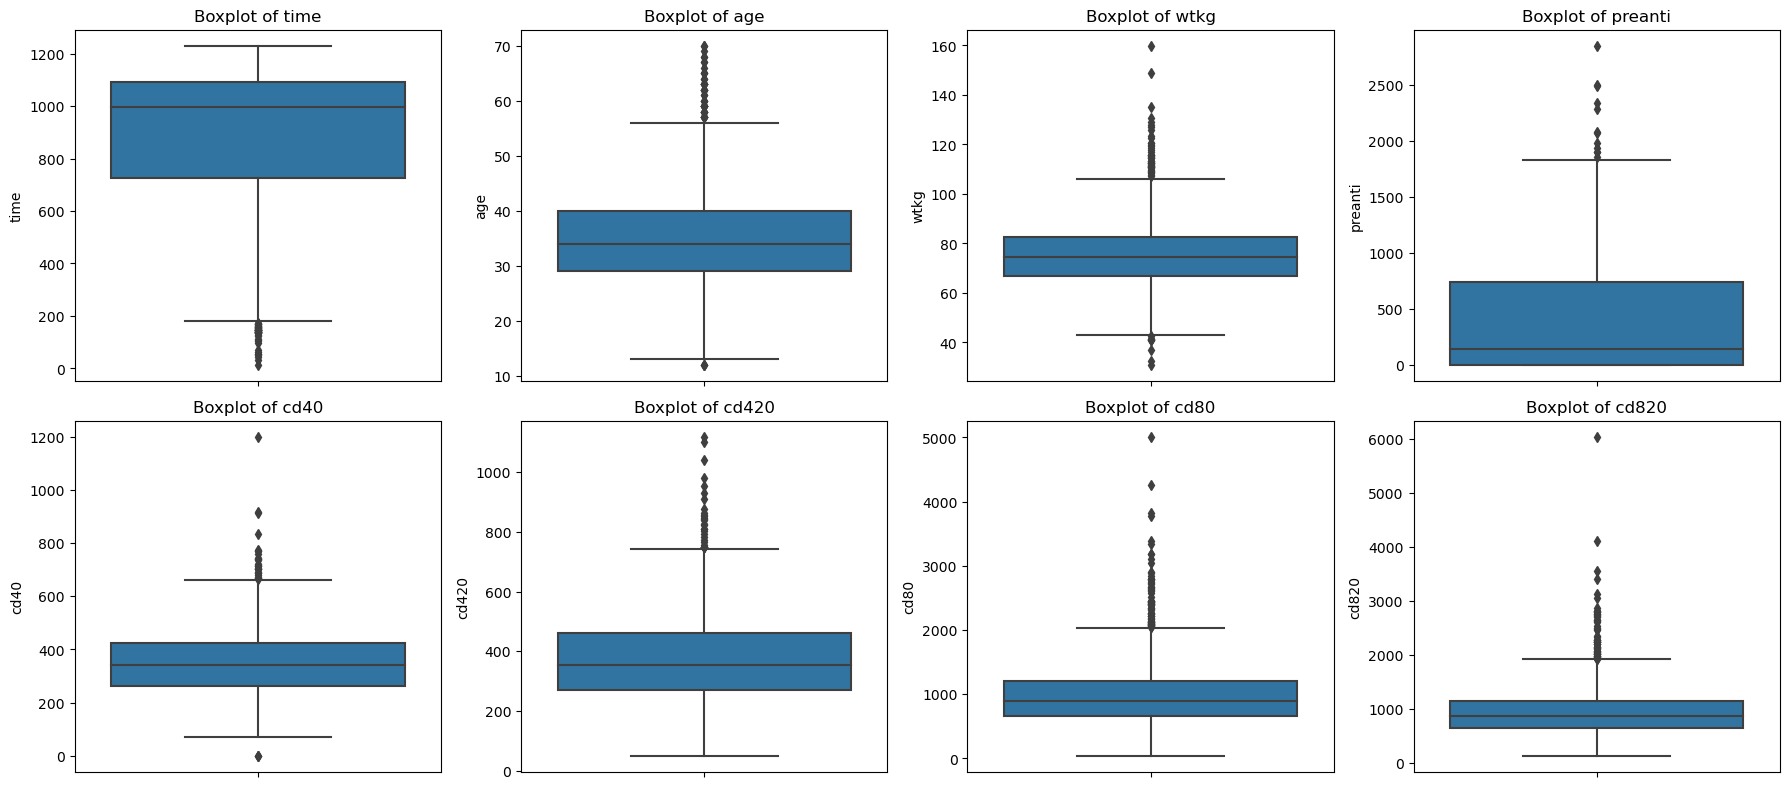

In [27]:
# Calling boxplot Function
boxplot(data, num_cols)

It can be seen that:
- The total number of columns is 23 with 15 being categorical columns and 8 being numerical columns.
- The target mean for female gender (0.20) is less than that for male gender (0.25).
- The average for white race (0.25) is higher than non-white race (0.20).
- There are outliers that require outlier handling.

## 4) Object Determining

In [28]:
# Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2139 non-null   int64  
 1   trt       2139 non-null   int64  
 2   age       2139 non-null   int64  
 3   wtkg      2139 non-null   float64
 4   hemo      2139 non-null   int64  
 5   homo      2139 non-null   int64  
 6   drugs     2139 non-null   int64  
 7   karnof    2139 non-null   int64  
 8   oprior    2139 non-null   int64  
 9   z30       2139 non-null   int64  
 10  preanti   2139 non-null   int64  
 11  race      2139 non-null   int64  
 12  gender    2139 non-null   int64  
 13  str2      2139 non-null   int64  
 14  strat     2139 non-null   int64  
 15  symptom   2139 non-null   int64  
 16  treat     2139 non-null   int64  
 17  offtrt    2139 non-null   int64  
 18  cd40      2139 non-null   int64  
 19  cd420     2139 non-null   int64  
 20  cd80      2139 non-null   int6

In [29]:
# Counts the frequency of unique value occurrences in each column
data.value_counts()

time  trt  age  wtkg      hemo  homo  drugs  karnof  oprior  z30  preanti  race  gender  str2  strat  symptom  treat  offtrt  cd40  cd420  cd80  cd820  infected
14    3    30   64.63800  0     1     0      90      0       0    0        0     1       0     1      1        1      0       131   253    227   496    1           1
1068  3    31   95.50000  0     1     0      90      0       1    199      0     1       1     2      0        1      0       302   554    478   595    0           1
1071  0    29   49.80528  0     0     0      100     0       1    144      0     0       1     2      0        0      1       374   380    649   786    0           1
1070  1    31   56.70000  0     1     0      90      0       1    822      0     1       1     3      0        1      0       380   380    1220  1290   0           1
           29   65.50000  0     1     0      100     0       1    367      1     1       1     3      0        1      0       431   420    843   745    0           1
         

## 5) Data Cleaning

In [30]:
# Missing Value
data.isnull().sum()

time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64

In [31]:
# Data Duplicated
data.duplicated().sum()

0

In [32]:
# Outliers
data_clean = data.copy()

for col in num_cols:
    if col != 'infected':
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        data_clean[col] = data[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
        print(f"Outliers in '{col}' column have been handled using the IQR method.")

Outliers in 'time' column have been handled using the IQR method.
Outliers in 'age' column have been handled using the IQR method.
Outliers in 'wtkg' column have been handled using the IQR method.
Outliers in 'preanti' column have been handled using the IQR method.
Outliers in 'cd40' column have been handled using the IQR method.
Outliers in 'cd420' column have been handled using the IQR method.
Outliers in 'cd80' column have been handled using the IQR method.
Outliers in 'cd820' column have been handled using the IQR method.


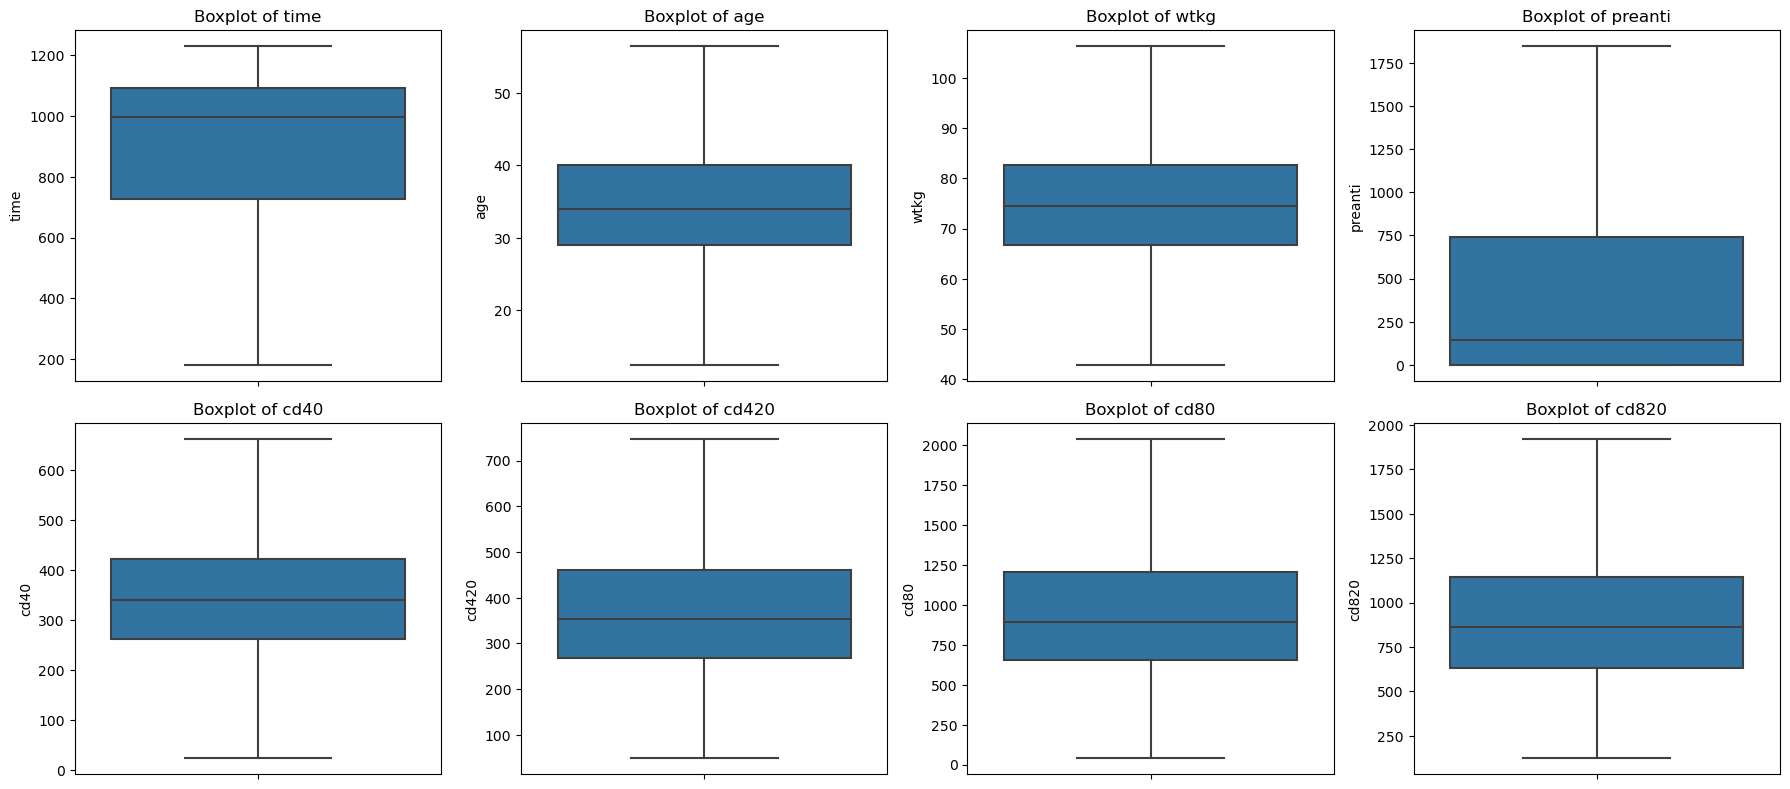

In [33]:
boxplot(data_clean, num_cols)

## 6) Feature Engineering

In [34]:
# Data Information
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2139 non-null   float64
 1   trt       2139 non-null   int64  
 2   age       2139 non-null   float64
 3   wtkg      2139 non-null   float64
 4   hemo      2139 non-null   int64  
 5   homo      2139 non-null   int64  
 6   drugs     2139 non-null   int64  
 7   karnof    2139 non-null   int64  
 8   oprior    2139 non-null   int64  
 9   z30       2139 non-null   int64  
 10  preanti   2139 non-null   float64
 11  race      2139 non-null   int64  
 12  gender    2139 non-null   int64  
 13  str2      2139 non-null   int64  
 14  strat     2139 non-null   int64  
 15  symptom   2139 non-null   int64  
 16  treat     2139 non-null   int64  
 17  offtrt    2139 non-null   int64  
 18  cd40      2139 non-null   float64
 19  cd420     2139 non-null   float64
 20  cd80      2139 non-null   floa

In [35]:
# Data Description
data_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
time,2139.0,880.302010,289.209229,181.0000,727.0000,997.0000,1091.0000,1231.0000
trt,2139.0,1.520804,1.127890,0.0000,1.0000,2.0000,3.0000,3.0000
age,2139.0,35.131837,8.360611,12.5000,29.0000,34.0000,40.0000,56.5000
wtkg,2139.0,74.905023,12.441725,42.8652,66.6792,74.3904,82.5552,106.3692
hemo,2139.0,0.084151,0.277680,0.0000,0.0000,0.0000,0.0000,1.0000
homo,2139.0,0.661057,0.473461,0.0000,0.0000,1.0000,1.0000,1.0000
drugs,2139.0,0.131370,0.337883,0.0000,0.0000,0.0000,0.0000,1.0000
karnof,2139.0,95.446470,5.900985,70.0000,90.0000,100.0000,100.0000,100.0000
oprior,2139.0,0.021973,0.146629,0.0000,0.0000,0.0000,0.0000,1.0000
z30,2139.0,0.550257,0.497584,0.0000,0.0000,1.0000,1.0000,1.0000


## 7) Label Definition

In [36]:
# Split features (X) and targets (y) in the dataset
X = data_clean.drop("infected", axis = 1)
y = data_clean["infected"]

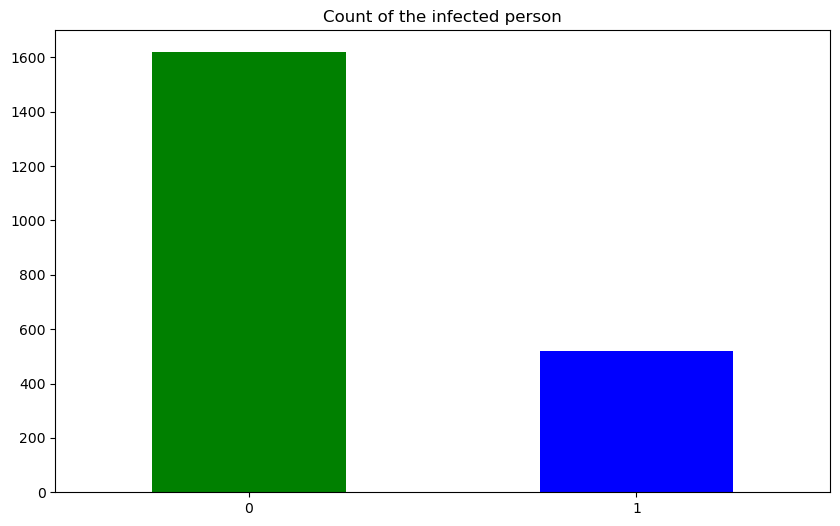

In [37]:
# bar plot visualization showing the number of individuals belonging to each category in the infected column
data_clean['infected'].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("Count of the infected person")
plt.xticks(rotation=0)

In [38]:
# Handling Imbalance Data
smote = SMOTE(random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y)

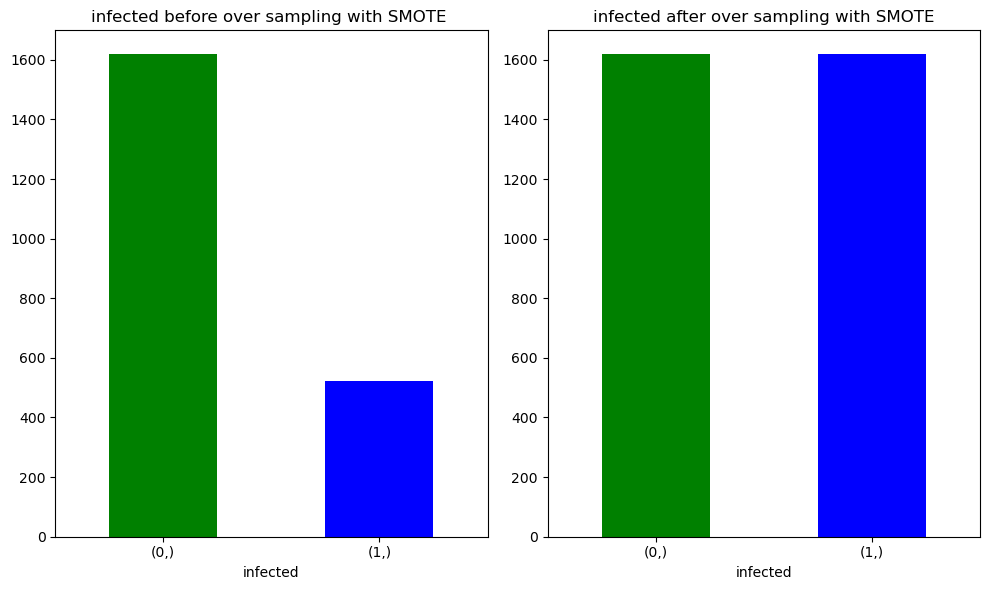

In [39]:
# Visualization before and after oversampling
plt.figure(figsize=(12, 4))

new_df1 = pd.DataFrame(data=y)

plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("infected before over sampling with SMOTE ")
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
new_df2 = pd.DataFrame(data=y_smote_resampled)

new_df2.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("infected after over sampling with SMOTE")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [40]:
# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42,stratify=y_smote_resampled)

## 8) Model Building

In [41]:
# Model Initiation
nb = GaussianNB()
rf = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()

models = {
    "Naive Bayes": nb,
    "Random Forest": rf,
    "SVM": svm,
    "Logistic Regression": lr,
    "Decision Tree": dt,
    "K-Nearest Neighbors": knn,
}

In [42]:
# Naive Bayes
nb.fit(X_train, y_train)
nb_y_pred = nb.predict(X_test)
accuracy_nb = round(accuracy_score(y_test, nb_y_pred), 3)
print(confusion_matrix(y_test, nb_y_pred))

[[257  67]
 [ 45 279]]


In [43]:
# Classification report of Gaussian Naive Bayes Model
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       324
           1       0.81      0.86      0.83       324

    accuracy                           0.83       648
   macro avg       0.83      0.83      0.83       648
weighted avg       0.83      0.83      0.83       648



In [44]:
# Random Forest
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
accuracy_rf = round(accuracy_score(y_test, rf_y_pred), 3)
print(confusion_matrix(y_test, rf_y_pred))

[[303  21]
 [ 16 308]]


In [45]:
# Classification Report of Random Forest Model
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       324
           1       0.94      0.95      0.94       324

    accuracy                           0.94       648
   macro avg       0.94      0.94      0.94       648
weighted avg       0.94      0.94      0.94       648



In [46]:
# SVM
svm.fit(X_train, y_train)
svm_y_pred = svm.predict(X_test)
accuracy_svm = round(accuracy_score(y_test, svm_y_pred), 3)
print(confusion_matrix(y_test, svm_y_pred))

[[273  51]
 [ 37 287]]


In [47]:
# Classification Report of SVM Model
print(classification_report(y_test, svm_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       324
           1       0.85      0.89      0.87       324

    accuracy                           0.86       648
   macro avg       0.86      0.86      0.86       648
weighted avg       0.86      0.86      0.86       648



In [48]:
# Logistic Regression
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)
accuracy_lr = round(accuracy_score(y_test, lr_y_pred), 3)
print(confusion_matrix(y_test, lr_y_pred))

[[279  45]
 [ 59 265]]


c:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
# Classification Report of Logistic Regression Model
print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       324
           1       0.85      0.82      0.84       324

    accuracy                           0.84       648
   macro avg       0.84      0.84      0.84       648
weighted avg       0.84      0.84      0.84       648



In [50]:
# Decision Tree
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)
accuracy_dt = round(accuracy_score(y_test, dt_y_pred), 3)
print(confusion_matrix(y_test, dt_y_pred))

[[286  38]
 [ 33 291]]


In [51]:
# Classification Report of Decision Tree Model
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       324
           1       0.88      0.90      0.89       324

    accuracy                           0.89       648
   macro avg       0.89      0.89      0.89       648
weighted avg       0.89      0.89      0.89       648



In [52]:
# K-Nearest Neighbor
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)
accuracy_knn = round(accuracy_score(y_test, knn_y_pred), 3)
print(confusion_matrix(y_test, knn_y_pred))

[[274  50]
 [ 14 310]]


In [53]:
# Classification Report of K-Nearest Neighbor Model
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       324
           1       0.86      0.96      0.91       324

    accuracy                           0.90       648
   macro avg       0.91      0.90      0.90       648
weighted avg       0.91      0.90      0.90       648



## 9) Model Comparison

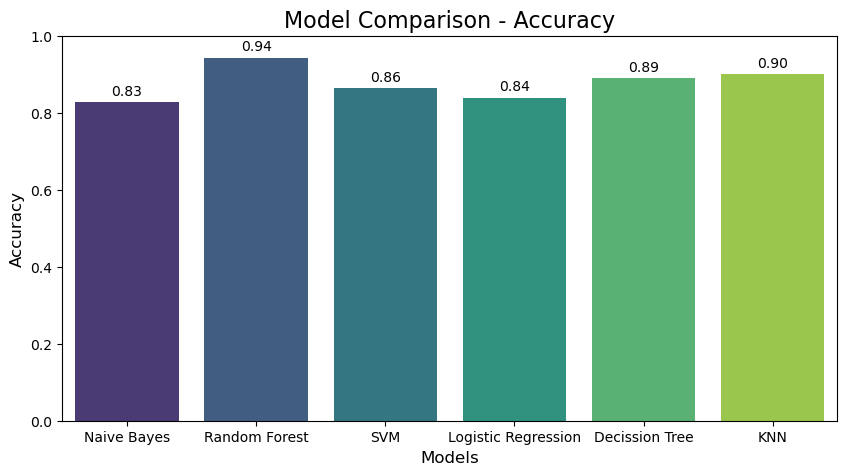

In [54]:
models = ['Naive Bayes', 'Random Forest', 'SVM', 'Logistic Regression', 'Decission Tree', 'KNN']
accuracies = [
    accuracy_score(y_test, nb_y_pred),
    accuracy_score(y_test, rf_y_pred),
    accuracy_score(y_test, svm_y_pred),
    accuracy_score(y_test, lr_y_pred),
    accuracy_score(y_test, dt_y_pred),
    accuracy_score(y_test, knn_y_pred)
]
plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=accuracies, palette='viridis')
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=10, color='black')
plt.title('Model Comparison - Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.ylim(0, 1)
plt.show()